In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re 
from scipy import stats

import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('seaborn-poster')



Imported raw data, "00. InfoProduct.csv", into notebook. Data downloaded from Kaggle.com.

In [2]:
raw1 = pd.read_csv("00. InfoProduct.csv")

The following cell cleans the `raw1` data. 
1. We drop the 'Reviewer' column as the identifier for each reviewer is not relevant for our data analysis.
2. We put all of the column names in lowercase letters to make it easier to refer to specific columns for future analysis.
3. We changed the 'Price' column's currency from Indonesian Rupiah (RP) to USD. We do this by finding the exchange rate and muliplying that rate by every row in that column. 
4. Renamed 'merk' column to 'brand' since merk in Indonesian translates to brand in English

In [3]:
# 1. Drop "Reviewer" column
raw1=raw1.drop(['Reviewer'], axis=1)

# 2. lowercase column titles
new_colnames = [i.lower() for i in raw1.columns]
raw1=raw1.copy()
raw1.columns=new_colnames

# 3. Price: Rp --> USD
raw1['price'] = raw1['price'].str.replace('Rp.', '')
raw1['price'] = raw1['price'].str.replace('.','')
raw1['price'] = raw1['price'].astype(float)
raw1["price"] = 0.00007 * raw1["price"]

# 4. rename merk --> brand
raw1 = raw1.rename(columns = {"merk" : "brand"})
raw1 = raw1.rename(columns = {"overallrating" : "rating"})
raw1.head()

,category,brand,product,price,rating
0,Night Cream,Hada Labo,Perfect 3D Gel,6.37,3.8
1,Face Mist,PIXY,Aqua Beauty Protecting Mist,1.89,4.2
2,Night Cream,Wardah,Lightening Night Cream,0.00,3.5
3,Face Mist,Avene,Thermal Spring Water,13.93,4.4
4,Night Cream,Wardah,White Secret Night Cream,6.86,3.6


In the next cell we find the average ratings grouped by brand. 

In [4]:
#groupby avg rating by brand
brands_group=raw1.groupby('brand')['rating'].mean()



Now, we create a scatter plot too look at the relationship between rating and price of a product. We 2 distinct outliers that make our scatter plot unhelpful in showing the relationship of interest. We fix this in the next cell.

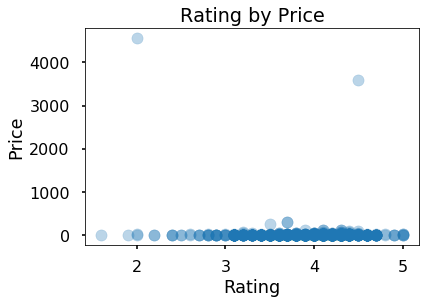

In [5]:
plt.scatter(x=raw1['rating'],y=raw1["price"], alpha=0.3)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Rating by Price')
plt.show()

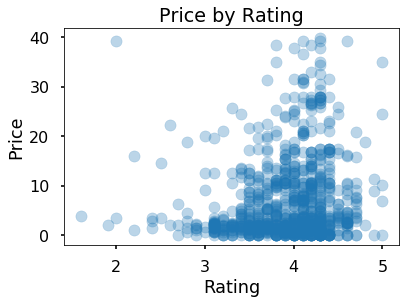

In [6]:
skincare_subset=raw1.loc[(raw1['price']<40)]
plt.scatter(x=skincare_subset['rating'],y=skincare_subset["price"], alpha=0.3)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Price by Rating')
plt.show()


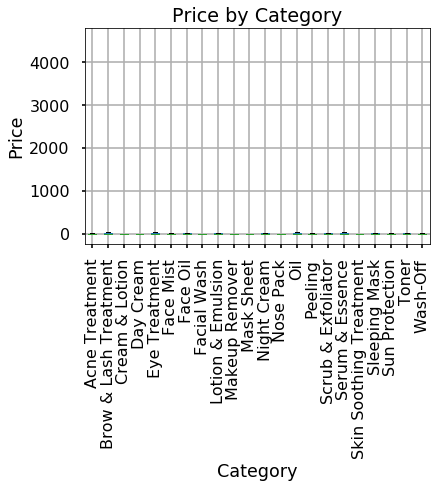

In [7]:
plot=raw1.boxplot('price', by='category', rot=90)
raw1['category'].unique()
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Price by Category')
plt.suptitle('')
plt.show()

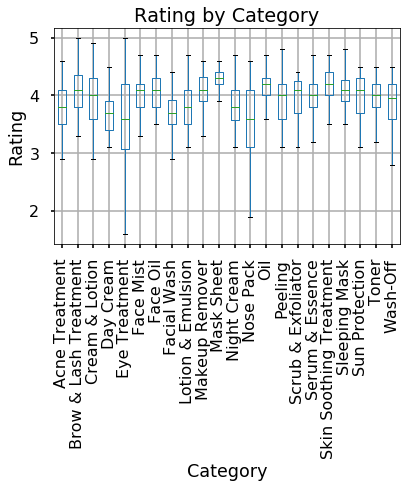

In [8]:
plot=raw1.boxplot('rating', by='category', rot=90)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Rating by Category')
plt.suptitle('')
plt.show()

In [9]:
raw2 = pd.read_csv("cosmetic.csv")
raw2.head()

,Label,URL,brand,name,price,rank,skin_type,ingredients
0,moisturizing-cream-oils-mists,https://www.sephora.com/product/creme-de-la-me...,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,moisturizing-cream-oils-mists,https://www.sephora.com/product/facial-treatme...,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o..."
2,moisturizing-cream-oils-mists,https://www.sephora.com/product/protini-tm-pol...,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...
3,moisturizing-cream-oils-mists,https://www.sephora.com/product/the-moisturizi...,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,moisturizing-cream-oils-mists,https://www.sephora.com/product/your-skin-but-...,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...


In [10]:
col_lower = [i.lower() for i in raw2.columns]
raw2=raw2.copy()
raw2.columns=col_lower

In [11]:
raw2.head()

,label,url,brand,name,price,rank,skin_type,ingredients
0,moisturizing-cream-oils-mists,https://www.sephora.com/product/creme-de-la-me...,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,moisturizing-cream-oils-mists,https://www.sephora.com/product/facial-treatme...,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o..."
2,moisturizing-cream-oils-mists,https://www.sephora.com/product/protini-tm-pol...,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...
3,moisturizing-cream-oils-mists,https://www.sephora.com/product/the-moisturizi...,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,moisturizing-cream-oils-mists,https://www.sephora.com/product/your-skin-but-...,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...


In [12]:
#drop url column
raw2=raw2.drop(['url'], axis=1)

In [13]:
liste = [i.split("-",1)[0] for i in raw2.label]
skin = raw2.copy()
skin['label'] = liste 

skin.head()



,label,brand,name,price,rank,skin_type,ingredients
0,moisturizing,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,moisturizing,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o..."
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...
3,moisturizing,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...


In [14]:
print(skin.skin_type.unique())
unique_skin_list = ['Normal','Oily', 'Combination', 'Dry', 'Sensitive', 'Full', 'Natural', 'Matte', 'Light', 'Radiant']

["['✔ Normal\\n', '✔ Oily\\n', '✔ Combination\\n', '✔ Dry\\n', '✔ Sensitive\\n']"
 "['✔ Normal\\n', '✔ Oily\\n', '✔ Combination\\n', '✔ Dry\\n']"
 "['✔ Full\\n', '✔ Sensitive\\n', '✔ Normal\\n', '✔ Dry\\n', '✔ Combination\\n', '✔ Oily\\n', '✔ Natural\\n']"
 "['✔ Normal\\n', '✔ Oily\\n', '✔ Combination\\n', '✔ Sensitive\\n']" '[]'
 "['✔ Normal\\n', '✔ Oily\\n', '✔ Combination\\n']"
 "['✔ Normal\\n', '✔ Dry\\n', '✔ Sensitive\\n']"
 "['✔ Normal\\n', '✔ Combination\\n', '✔ Dry\\n']"
 "['✔ Normal\\n', '✔ Dry\\n']" "['✔ Combination\\n', '✔ Dry\\n']"
 "['✔ Oily\\n', '✔ Dry\\n', '✔ Sensitive\\n']"
 "['✔ Full\\n', '✔ Normal\\n', '✔ Dry\\n', '✔ Combination\\n', '✔ Oily\\n', '✔ Matte\\n']"
 "['✔ Normal\\n', '✔ Combination\\n', '✔ Dry\\n', '✔ Sensitive\\n']"
 "['✔ Oily\\n', '✔ Combination\\n']"
 "['✔ Medium\\n', '✔ Normal\\n', '✔ Dry\\n', '✔ Combination\\n', '✔ Oily\\n', '✔ Matte\\n']"
 "['✔ Full\\n', '✔ Sensitive\\n', '✔ Normal\\n', '✔ Dry\\n', '✔ Combination\\n', '✔ Oily\\n', '✔ Radiant\\n']"
 "

In [15]:
for x in unique_skin_list:
    skin[x]=0

skin.head()

,label,brand,name,price,rank,skin_type,ingredients,Normal,Oily,Combination,Dry,Sensitive,Full,Natural,Matte,Light,Radiant
0,moisturizing,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0,0,0,0,0,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...",0,0,0,0,0,0,0,0,0,0
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...,0,0,0,0,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",0,0,0,0,0,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,0,0,0,0,0,0,0,0,0,0


In [16]:
skin['skin_type'] = skin['skin_type'].astype(str)

In [17]:
count=-1
for x in skin['skin_type']:
    count+=1
    for s_type in unique_skin_list:
        if s_type in x:
            skin.loc[count,s_type]=1

            


In [18]:
skin

,label,brand,name,price,rank,skin_type,ingredients,Normal,Oily,Combination,Dry,Sensitive,Full,Natural,Matte,Light,Radiant
0,moisturizing,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...",1,1,1,1,1,0,0,0,0,0
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...,1,1,1,1,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,1,1,1,1,1,1,1,0,0,0
5,moisturizing,TATCHA,The Water Cream,$68.00,4.2,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-Japanese Wild Rose: Supports natural circulat...,1,1,1,0,1,0,0,0,0,0
6,moisturizing,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,$60.00,4.2,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-Blend of Six African Oils: Delivers intense h...,1,1,1,1,0,0,0,0,0,0
7,moisturizing,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil,$72.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-Virgin Marula Oil: Helps nourish and rejuvena...,1,1,1,1,0,0,0,0,0,0
8,moisturizing,KIEHL'S SINCE 1851,Ultra Facial Cream,$29.50,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-Antarcticine (Glacial Glycoprotein Extract): ...,1,1,1,1,1,0,0,0,0,0
9,moisturizing,LA MER,Little Miss Miracle Limited-Edition Crème de l...,$325.00,5.0,[],"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0,0,0,0,0,0,0,0,0,0


In [19]:
skin['price'] = skin['price'].str.replace('$','')

In [20]:
skin.head()

,label,brand,name,price,rank,skin_type,ingredients,Normal,Oily,Combination,Dry,Sensitive,Full,Natural,Matte,Light,Radiant
0,moisturizing,LA MER,Crème de la Mer,175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,179.00\n(214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...",1,1,1,1,1,0,0,0,0,0
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...,1,1,1,1,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,1,1,1,1,1,1,1,0,0,0


In [21]:
skin['price'] = skin['price'].astype(str)
row=-1
for x in skin['price']:
    row+=1
    if len(x)>10:
        print(x)
        print(row)

179.00
(214.00 value)
1
90.00
(123.00 value)
15
69.00
(106.00 value)
178
68.00
(96.00 value)
185
179.00
(214.00 value)
300
90.00
(123.00 value)
307
45.00
(66.00 value)
451
7.00
(10.00 value)
454
34.00
(63.00 value)
515
39.00 27.00
544
55.00
(69.00 value)
551
28.00 19.00
557
35.00
(45.00 value)
577
179.00
(214.00 value)
600
158.00
(175.00 value)
603
178.00
(210.00 value)
607
88.00
(102.00 value)
608
90.00
(123.00 value)
617
88.00
(102.00 value)
618
28.00
(43.00 value)
620
23.00
(30.00 value)
625
88.00
(102.00 value)
700
68.00
(97.00 value)
733
100.00 59.00
757
169.00
(189.00 value)
759
35.00
(71.00 value)
761
29.00
(67.00 value)
785
90.00 59.00
795
68.00
(72.00 value)
801
55.00
(88.00 value)
803
59.00
(93.00 value)
820
34.00
(63.00 value)
836
84.00
(115.00 value)
843
75.00
(254.00 value)
901
135.00
(170.00 value)
902
36.00
(57.00 value)
904
25.00
(36.00 value)
905
18.00
(24.00 value)
934
169.00
(236.00 value)
957
34.00 22.00
1003
35.00
(45.00 value)
1063
69.00 45.00
1084
20.00 11.00
109

In [22]:
step=-1
for x in skin['price']:
    step+=1
    if len(x)>10:
        first_dec=skin.loc[step,'price'].find('.')
        skin.loc[step,'price']= skin.loc[step,'price'][:(first_dec+3)]

            
skin.head()

,label,brand,name,price,rank,skin_type,ingredients,Normal,Oily,Combination,Dry,Sensitive,Full,Natural,Matte,Light,Radiant
0,moisturizing,LA MER,Crème de la Mer,175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,179.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...",1,1,1,1,1,0,0,0,0,0
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...,1,1,1,1,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,1,1,1,1,1,1,1,0,0,0


In [23]:
row=-1
for x in skin['price']:
    row+=1
    if len(x)>10:
        print(x)
        print(row)

In [24]:
skin = skin.drop(['skin_type'], axis = 1)

In [25]:
skin

,label,brand,name,price,rank,ingredients,Normal,Oily,Combination,Dry,Sensitive,Full,Natural,Matte,Light,Radiant
0,moisturizing,LA MER,Crème de la Mer,175.00,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,179.00,4.1,"-Pitera™: A bio-ingredient rich in vitamins, o...",1,1,1,1,1,0,0,0,0,0
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.00,4.4,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,1,1,1,1,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,175.00,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.00,4.1,-Collagen: Supports skin elasticity for a yout...,1,1,1,1,1,1,1,0,0,0
5,moisturizing,TATCHA,The Water Cream,68.00,4.2,-Japanese Wild Rose: Supports natural circulat...,1,1,1,0,1,0,0,0,0,0
6,moisturizing,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,60.00,4.2,-Blend of Six African Oils: Delivers intense h...,1,1,1,1,0,0,0,0,0,0
7,moisturizing,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil,72.00,4.4,-Virgin Marula Oil: Helps nourish and rejuvena...,1,1,1,1,0,0,0,0,0,0
8,moisturizing,KIEHL'S SINCE 1851,Ultra Facial Cream,29.50,4.4,-Antarcticine (Glacial Glycoprotein Extract): ...,1,1,1,1,1,0,0,0,0,0
9,moisturizing,LA MER,Little Miss Miracle Limited-Edition Crème de l...,325.00,5.0,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0,0,0,0,0,0,0,0,0,0


In [26]:
lower_ingredients = [i.lower() for i in skin.columns]
skin=skin.copy()
skin.columns=lower_ingredients

In [27]:
skin.head()

,label,brand,name,price,rank,ingredients,normal,oily,combination,dry,sensitive,full,natural,matte,light,radiant
0,moisturizing,LA MER,Crème de la Mer,175.00,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,179.00,4.1,"-Pitera™: A bio-ingredient rich in vitamins, o...",1,1,1,1,1,0,0,0,0,0
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.00,4.4,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,1,1,1,1,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,175.00,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.00,4.1,-Collagen: Supports skin elasticity for a yout...,1,1,1,1,1,1,1,0,0,0
